In [ ]:
import tweepy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as md

In [ ]:
ckey="***" # Add the ckey instead of the ***
csecret="***" # Add the csecret instead of the ***
atoken="***" # Add the atoken instead of the ***
asecret="***" # Add the asecret instead of the ***

Location = []
Date = []
Text = []

OAUTH_KEYS = {'consumer_key':ckey, 'consumer_secret':csecret,'access_token_key':atoken, 'access_token_secret':asecret}
auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth)

t_words = ["#DonaldTrump OR #MAGA OR #Republican OR #Trump OR #Trump2020 OR #Trump2024 OR #TrumpWon OR DonaldTrump OR MAGA OR Republican OR Trump OR Trump2020 OR Trump2024 OR TrumpWon"]

Tweets = tweepy.Cursor(api.search, q=t_words, exclude= "retweets", lang="en", tweet_mode='extended', since="2021-01-20").items(10000)

for tweet in Tweets:
    Location.append(tweet.user.location)
    Date.append(tweet.created_at)
    Text.append(tweet.full_text.replace('\n', ' ').replace('\"', ' ').replace('\r', ' ').split())


In [ ]:
####################################################################################

In [ ]:
# Create word list and hashtags list:

Hashtags = []
N_Hashtags = {}

Words = []
N_Words = {}

for tweet in Text:
  for word in tweet:
    if word[0]=="#":
      Hashtags.append(word)
    else:
      Words.append(word)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129323 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129323 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


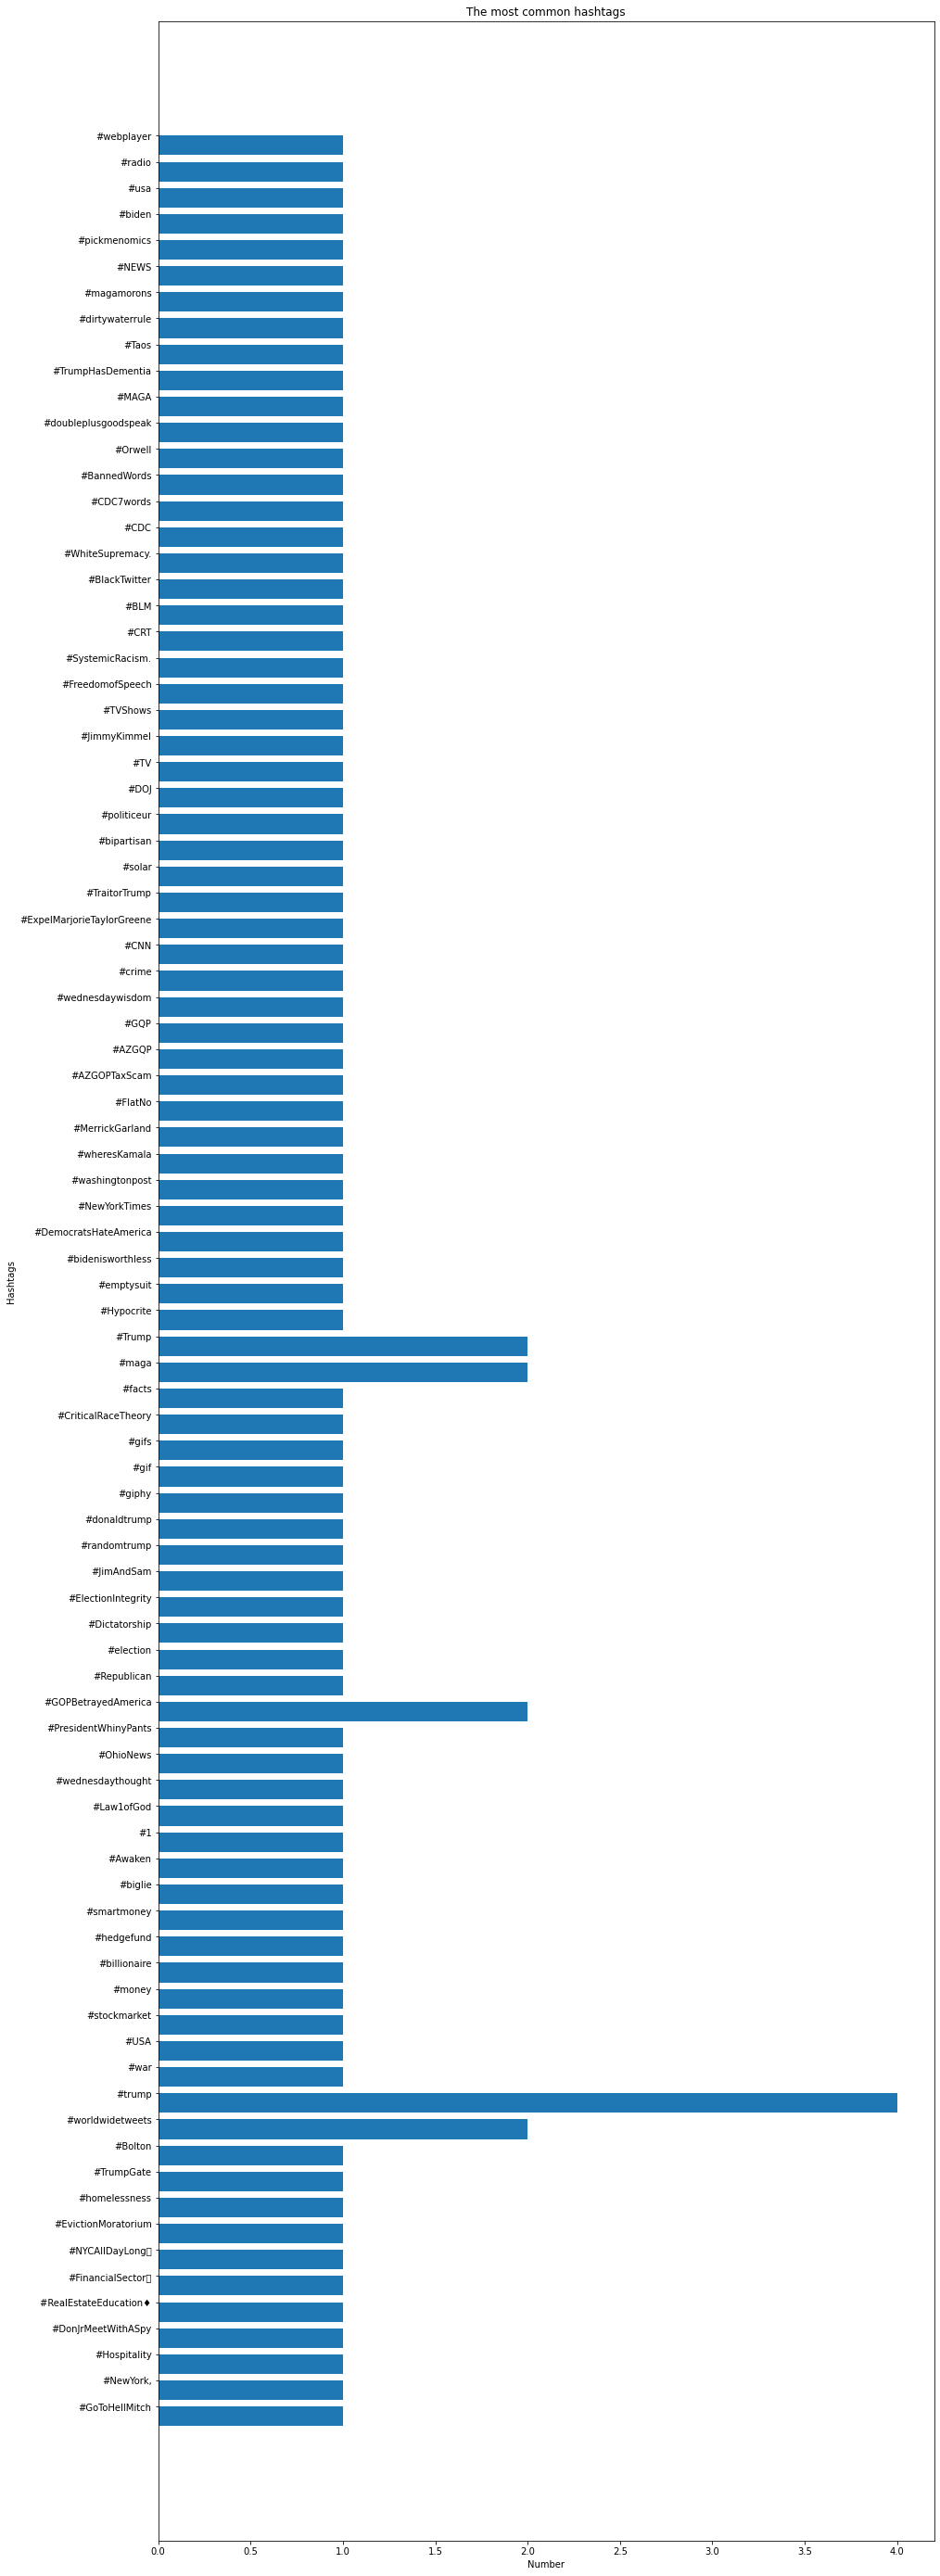

In [ ]:
# What are the most common hashtags:

for Hashtag in Hashtags:
  if Hashtag not in N_Hashtags:
    N_Hashtags[Hashtag] = 1
  else:
    N_Hashtags[Hashtag] = N_Hashtags[Hashtag]+1

x_h = N_Hashtags.keys()
y_h = N_Hashtags.values()

fig, ax = plt.subplots(figsize = (15,50))
width = 0.75
ind = np.arange(len(y_h))
ax.barh(ind, y_h, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x_h)
plt.title("The most common hashtags")
plt.xlabel("Number")
plt.ylabel("Hashtags")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9962 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128128 missing from current font.
  font.

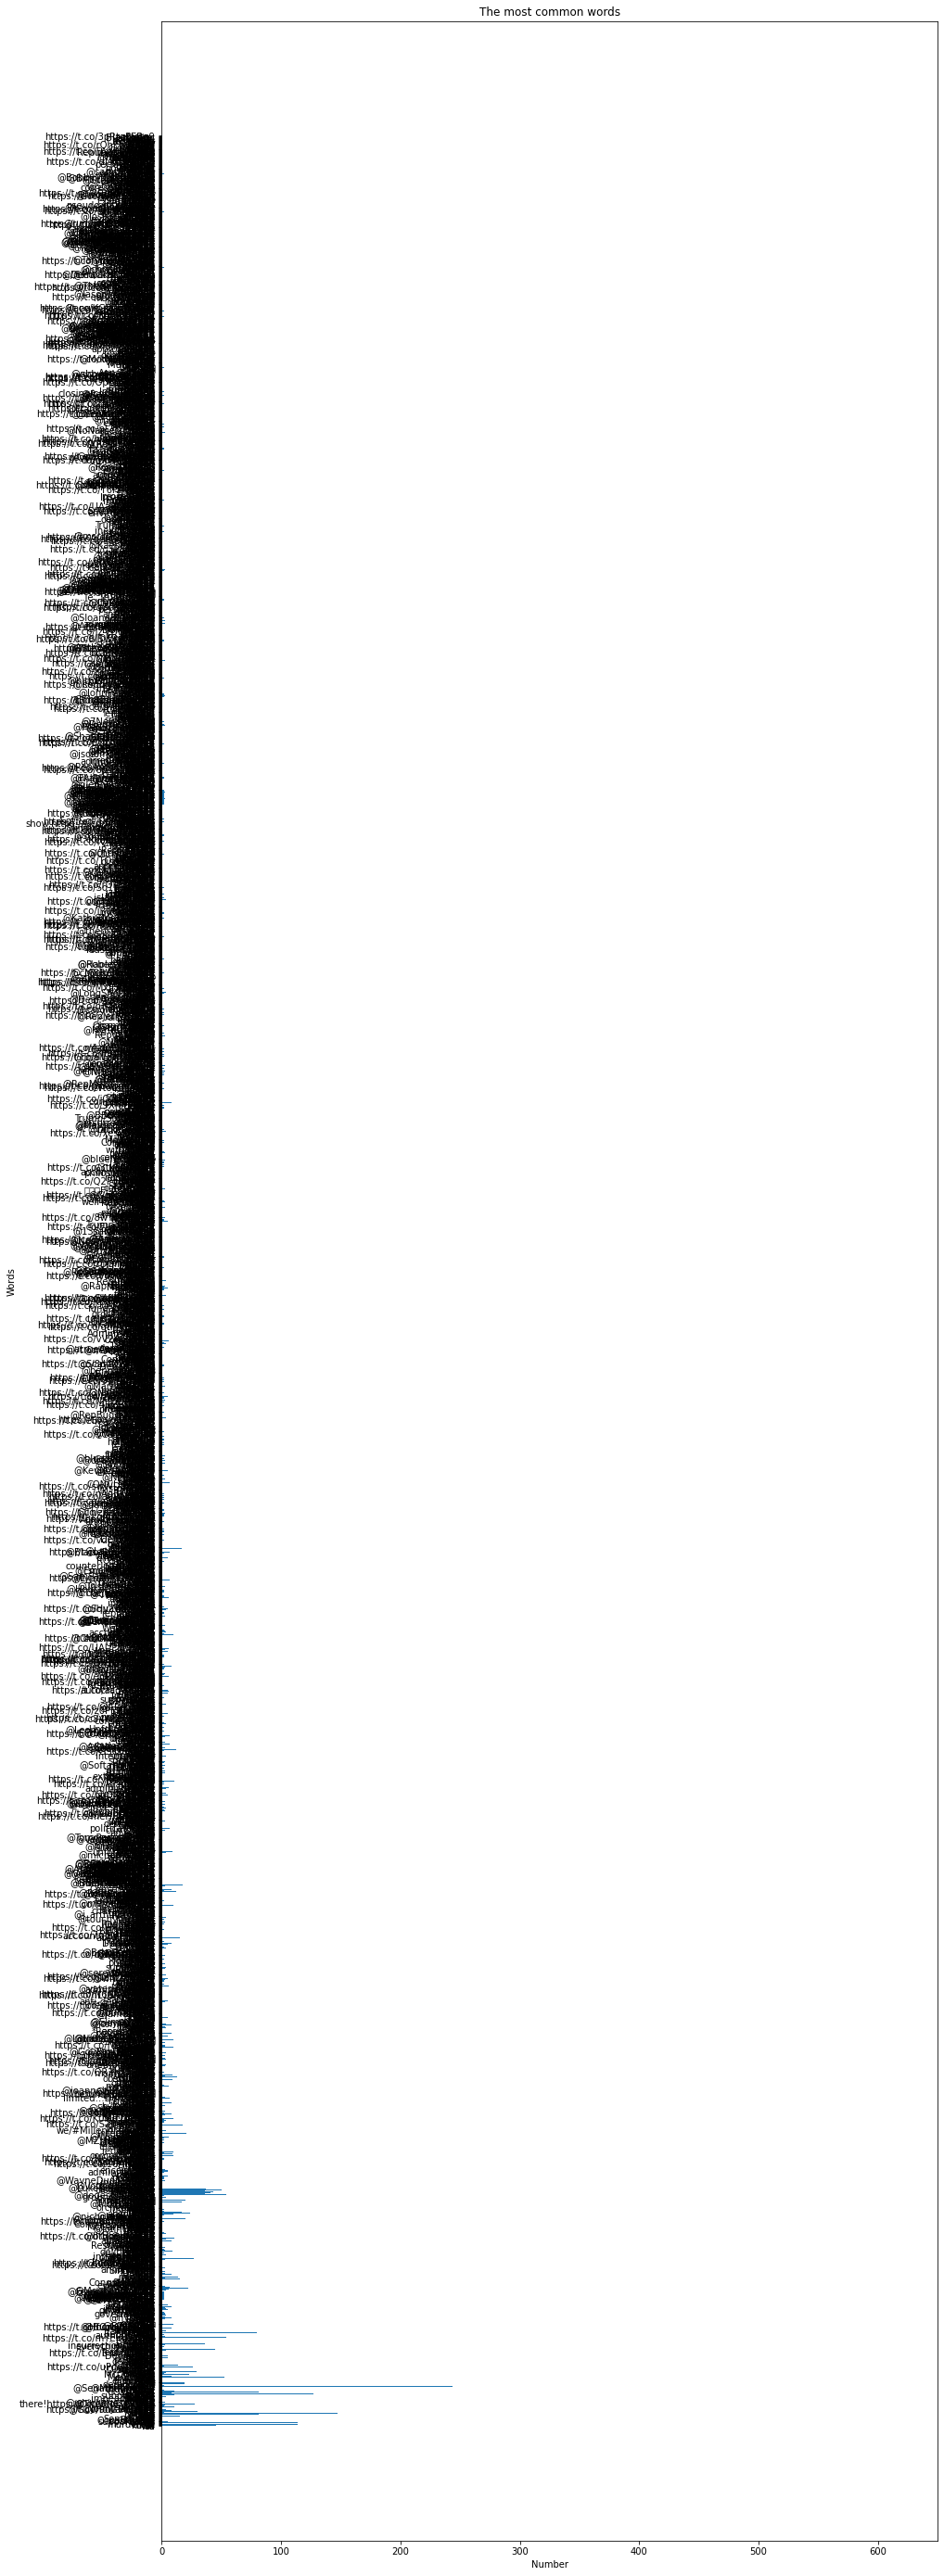

In [ ]:
# What are the most common words:

for Word in Words:
  if Word not in N_Words:
    N_Words[Word] = 1
  else:
    N_Words[Word] = N_Words[Word]+1

x_w = N_Words.keys()
y_w = N_Words.values()

fig, ax = plt.subplots (figsize = (15,50))
width = 0.75
ind = np.arange(len(y_w))
ax.barh(ind, y_w, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x_w)
plt.title("The most common words")
plt.xlabel("Number")
plt.ylabel("Words")
plt.show()

In [ ]:
####################################################################################

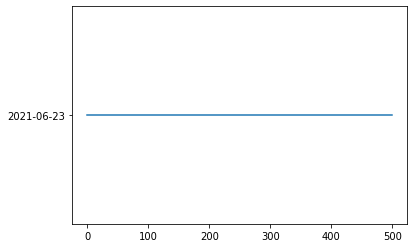

In [ ]:
# Dates graph of the tweets:

Date_y_m_d = []

for line in Date:
  Date_y_m_d.append(str(line)[0:10])

N_Date = np.asarray(Date_y_m_d)

fig, ax = plt.subplots(1, 1)
ax.plot(N_Date)

In [ ]:
####################################################################################